# 01 Import Library

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import Data

In [2]:
#folder shortcut
path = r'/Users/rachelmoreland/06_2023_Instacart Basket Analysis'

In [4]:
#importing newdataset
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_49_merged.pkl'))

In [5]:
#checking rows and columns
df_ords_prods_all.shape

(32404859, 33)

In [6]:
#taking a look at the df 
df_ords_prods_all.head()

,user_id,first,last,gender,state,age,date_joined,number_of_dependants,marital_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prices,spending_flag,median_order_freq,frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Least busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both


# 03 Task Part 2

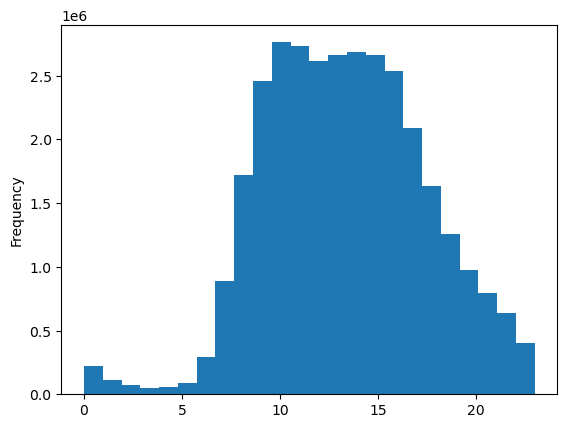

In [8]:
#3 creating a histogram for  order hour of day
hist_orders_hour_of_day = df_ords_prods_all['order_hour_of_day'].plot.hist(bins = 24)

## by viewing this histogram the peak hours of ordering instacart are approx 9AM to 4 PM and on a steady decline after 5 pm through the night. a small little increase around midnight. but once again low until about 5/6am

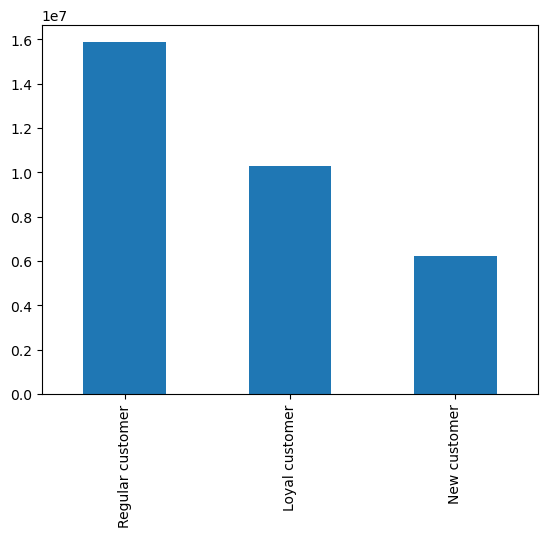

In [10]:
# 4 bar chart for loyalty flag customers
bar_loyalty_flag = df_ords_prods_all['loyalty_flag'].value_counts().plot.bar()

## Regular Customers make up the most of the customers for InstaCart

In [11]:
#5 making a accurate subset for making a line chart for prices and order hour of day
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7

In [12]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [13]:
# big is 70% of DF and small is 30%
big = df_ords_prods_all[dev]

In [14]:
# big is 70% of DF and small is 30%
small = df_ords_prods_all[~dev]

In [15]:
#checking the count of the whole DF
len(df_ords_prods_all)

32404859

In [16]:
# checking that the big and small data set = the same number 
len(big)+len (small)

32404859

In [18]:
#making the small df only contain 2 columns and renaming df_2
df_2 = small[['order_hour_of_day','prices']]

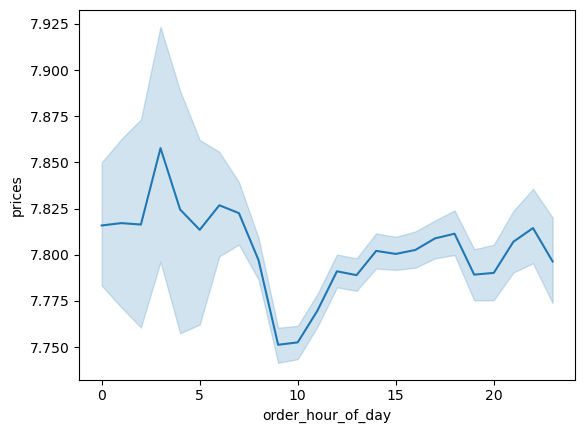

In [19]:
#5 making a line plot with the small df
line_hour_price = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

## there is no real relation to the price of items purchased and the hour of which they are purchased 

In [20]:
#looking at the column names
df_ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 object  
 1   first                   object  
 2   last                    object  
 3   gender                  object  
 4   state                   object  
 5   age                     int64   
 6   date_joined             object  
 7   number_of_dependants    int64   
 8   marital_status          object  
 9   income                  int64   
 10  product_id              int64   
 11  product_name            object  
 12  aisle_id                int64   
 13  department_id           int64   
 14  prices                  float64 
 15  order_id                int64   
 16  order_number            int64   
 17  orders_day_of_week      int64   
 18  order_hour_of_day       int64   
 19  days_since_prior_order  float64 
 20  add_to_cart_order       int64   
 21  reorde

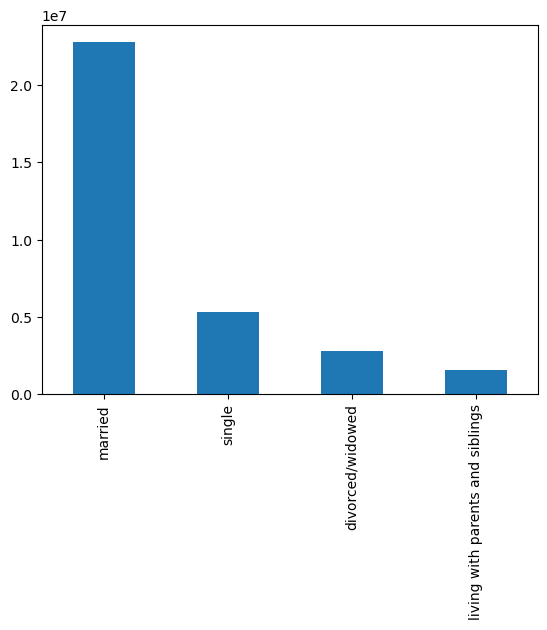

In [21]:
# 6 bar chart for marital status
bar_marital = df_ords_prods_all['marital_status'].value_counts().plot.bar()

## married people are make up for the majority of instacart customers

In [22]:
#6 making age brackets flags column

df_ords_prods_all.loc[df_ords_prods_all['age'] >= 90, 'age_bracket'] = '90+'

In [25]:
df_ords_prods_all.loc[(df_ords_prods_all['age'] <= 89) & (df_ords_prods_all['age'] >= 80), 'age_bracket'] = '80-89'

In [26]:
df_ords_prods_all.loc[(df_ords_prods_all['age'] <= 79) & (df_ords_prods_all['age'] >= 70), 'age_bracket'] = '70-79'

In [27]:
df_ords_prods_all.loc[(df_ords_prods_all['age'] <= 69) & (df_ords_prods_all['age'] >= 60), 'age_bracket'] = '60-69'

In [28]:
df_ords_prods_all.loc[(df_ords_prods_all['age'] <= 59) & (df_ords_prods_all['age'] >= 50), 'age_bracket'] = '50-59'

In [29]:
df_ords_prods_all.loc[(df_ords_prods_all['age'] <= 49) & (df_ords_prods_all['age'] >= 40), 'age_bracket'] = '40-49'

In [30]:
df_ords_prods_all.loc[(df_ords_prods_all['age'] <= 39) & (df_ords_prods_all['age'] >= 30), 'age_bracket'] = '30-39'

In [31]:
df_ords_prods_all.loc[(df_ords_prods_all['age'] <= 29) & (df_ords_prods_all['age'] >= 20), 'age_bracket'] = '20-29'

In [32]:
df_ords_prods_all.loc[(df_ords_prods_all['age'] <= 19) & (df_ords_prods_all['age'] >= 10), 'age_bracket'] = '10-19'

In [33]:
#checking the count for the age brackets of IC customers
df_ords_prods_all['age_bracket'].value_counts(dropna = False)

40-49    5109237
30-39    5073751
20-29    5070361
50-59    5064175
70-79    5055461
60-69    4987264
80-89    1024530
10-19    1020080
Name: age_bracket, dtype: int64

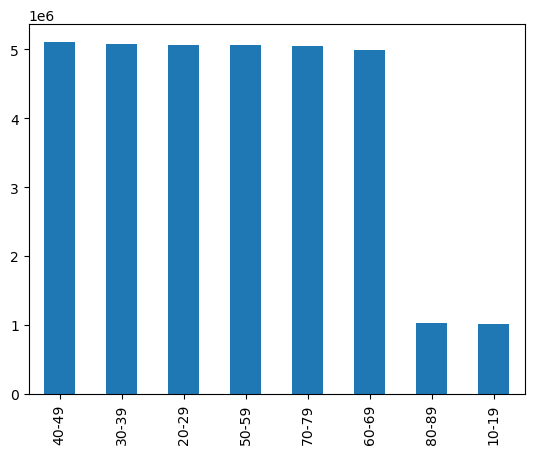

In [34]:
#bar chart on customers age bracket
bar_age_bracket = df_ords_prods_all['age_bracket'].value_counts().plot.bar()

## IC customers are less likely to be between the ages of 80-89 and 10-19 the rest are about the same 

In [35]:
#taking a look at the DF
df_ords_prods_all.head()

,user_id,first,last,gender,state,age,date_joined,number_of_dependants,marital_status,income,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prices,spending_flag,median_order_freq,frequency_flag,_merge,age_bracket
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both,40-49
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both,40-49
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both,40-49
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both,40-49
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Least busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both,40-49


In [37]:
#making a new df with just 2 columns in the small subset
df_3 = small[['number_of_dependants','age']]



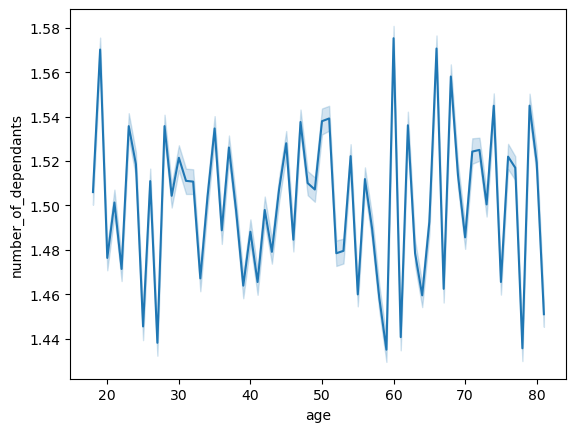

In [38]:
#6 line chart exploring age and number of dependants
line_age_dependants = sns.lineplot(data = df_3, x = 'age',y = 'number_of_dependants')

## by looking at this line chart there is no connection between age and number of dependants

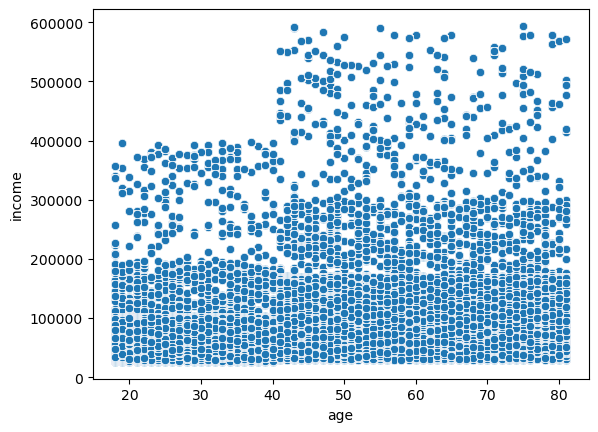

In [48]:
#7 scatterplot of age and income
scatter_age_income = sns.scatterplot(x = 'age', y = 'income',data = df_ords_prods_all)

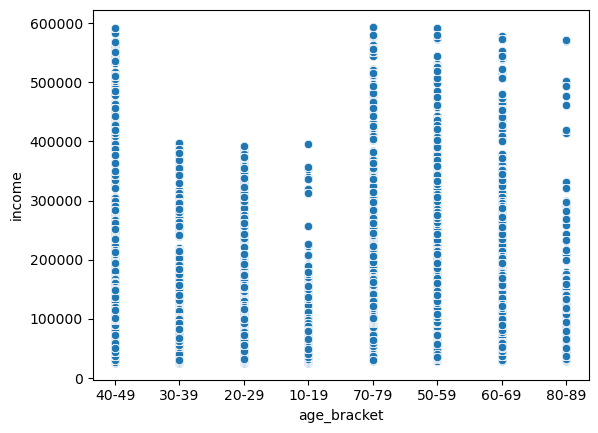

In [49]:
#7 scatterplot of age and income
scatter_age_bracket_income = sns.scatterplot(x = 'age_bracket', y = 'income',data = df_ords_prods_all)

## the scatterplot shows that once the customer is about 40+ they a higher income.  approx 40K and higher

In [ ]:
#8 saving all visualizations in Jupyter folder

In [52]:
hist_orders_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_hour_of_day.png'))

In [53]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [54]:
line_hour_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_price.png'))

In [55]:
bar_marital.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital.png'))

In [56]:
bar_age_bracket.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_bracket.png'))

In [57]:
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [58]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))